In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dtreeviz
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [120]:
diabetes = pd.read_csv('diabetes.csv')
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness',
            'SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, 
                                    test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], 
                                                                X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


# Regresja logistyczna

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

In [123]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, 
                    label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Funkcja, która oblicza najważniejsze metryki oraz rysuje wykresy.

In [125]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics_model(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

In [126]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


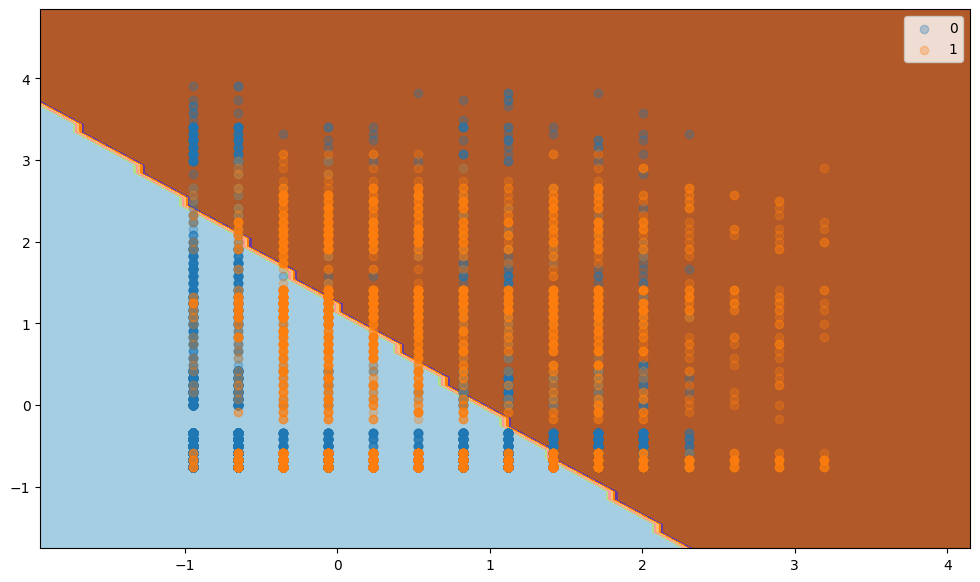

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



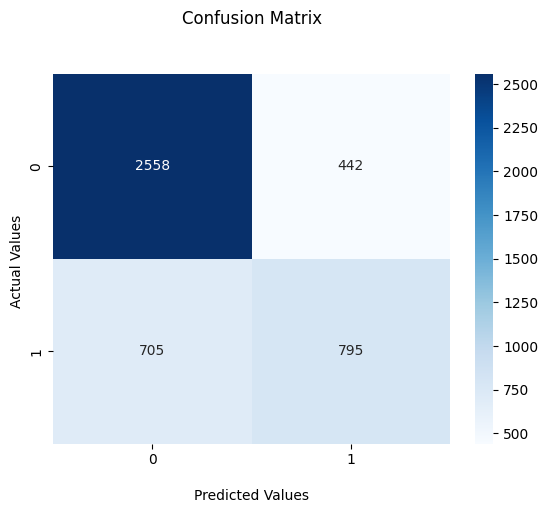

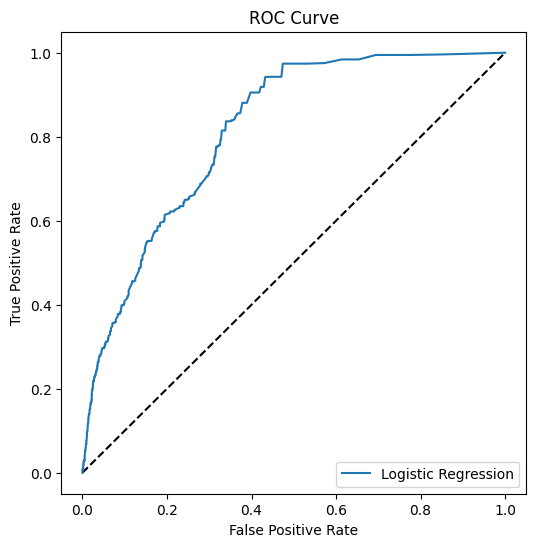

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493

In [127]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_lr)
predictions_lr = model_lr.predict(X_test_standardized)
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

# KNN (K Nearest Neighbours) – K najbliższych sąsiadów

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


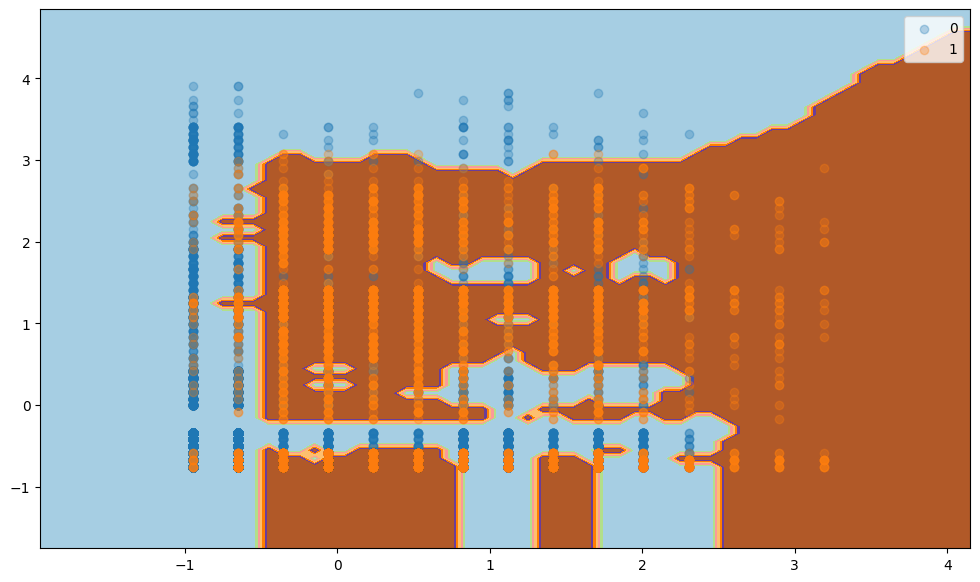

In [128]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.001))
model_knn.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_knn)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3000
           1       0.81      0.80      0.81      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.87      0.87      0.87      4500



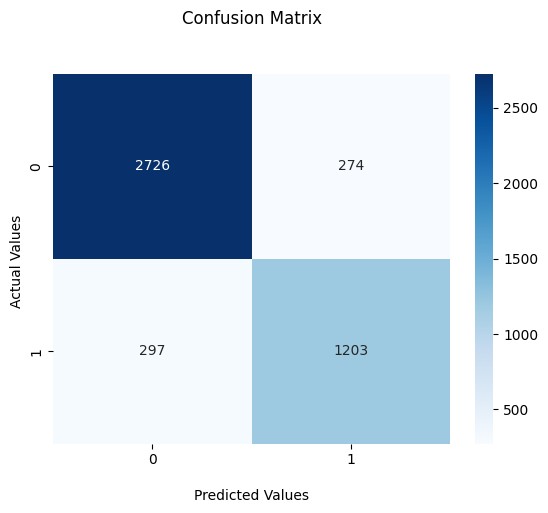

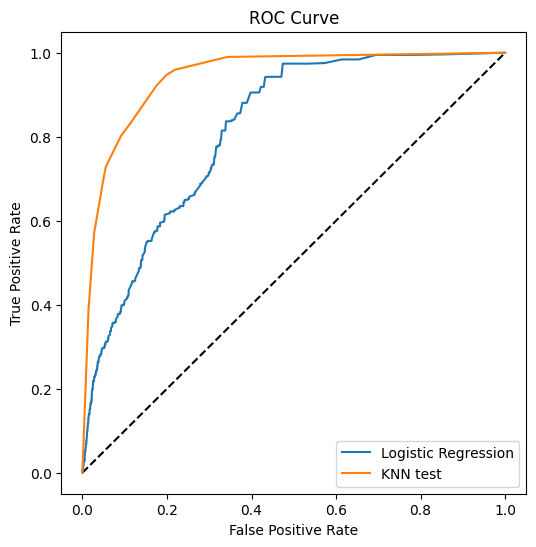

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\2051826720.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804

In [129]:
calculate_metrics_model(model_knn, 'KNN test', X_test_standardized, y_test)

### Ćwiczenie
Sprawdź jak zachowuje się model dla różnych K i metryk. Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym.

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


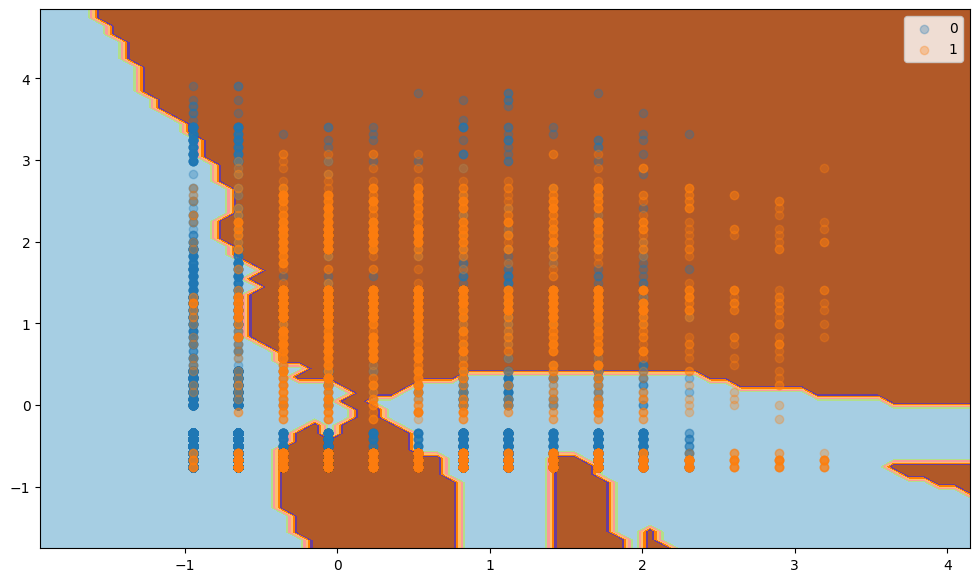

In [130]:
model_knn_euclidean = KNeighborsClassifier(n_neighbors= int(
                        X_train_standardized.shape[0]*0.050), 
            metric='euclidean')
model_knn_euclidean.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_knn_euclidean)

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


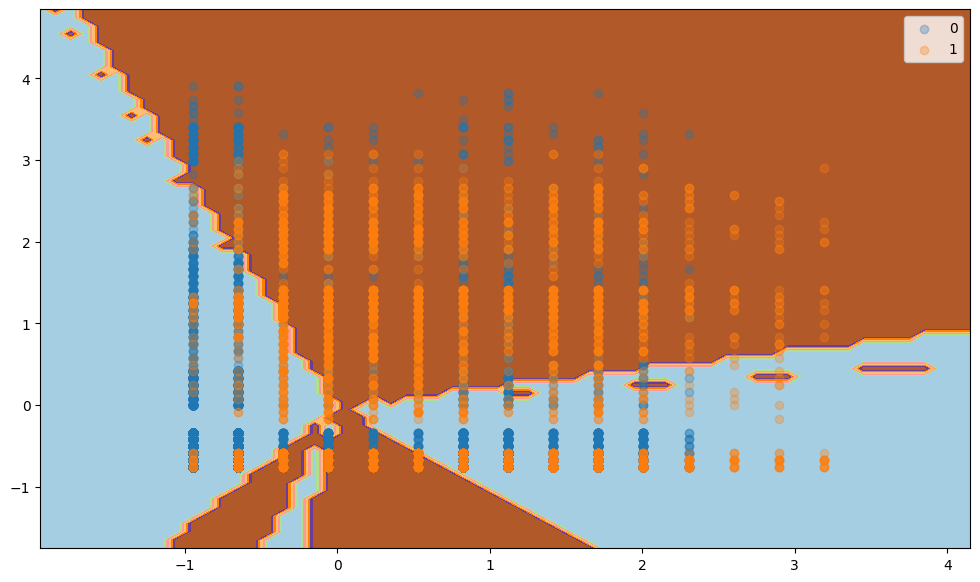

In [131]:
model_knn_cosine = KNeighborsClassifier(n_neighbors= int(
                    X_train_standardized.shape[0]*0.030), 
            metric='cosine')
model_knn_cosine.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_knn_cosine)

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


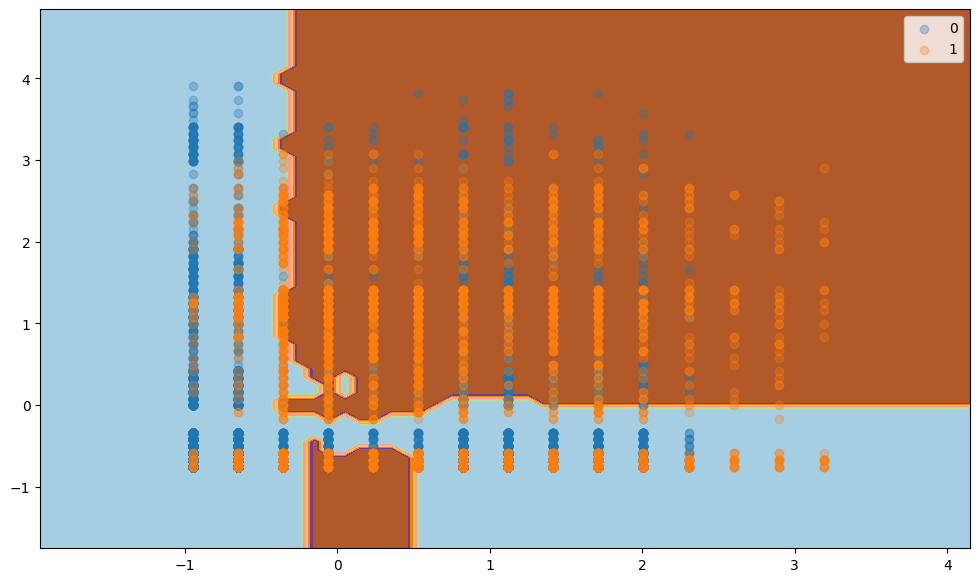

In [132]:
model_knn_canberra = KNeighborsClassifier(n_neighbors= int(
                    X_train_standardized.shape[0]*0.080), 
            metric='canberra')
model_knn_canberra.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_knn_canberra)

In [133]:
pred_knn = model_knn.predict(X_test_standardized)
print("F1_score knn test:", f1_score(y_test, pred_knn))
pred_knn = model_knn.predict(X_train_standardized)
print("F1_score knn train:", f1_score(y_train, pred_knn))
pred_knn_e = model_knn_euclidean.predict(X_test_standardized)
print("F1_score knn_euclidean test:", f1_score(y_test, pred_knn_e))
pred_knn_e = model_knn_euclidean.predict(X_train_standardized)
print("F1_score knn_euclidean train:", f1_score(y_train, pred_knn_e))
pred_knn_c = model_knn_cosine.predict(X_test_standardized)
print("F1_score knn_cosine test:", f1_score(y_test, pred_knn_c))
pred_knn_c = model_knn_cosine.predict(X_train_standardized)
print("F1_score knn_cosine train:", f1_score(y_train, pred_knn_c))
pred_knn_cb = model_knn_canberra.predict(X_test_standardized)
print("F1_score knn_canberra test:", f1_score(y_test, pred_knn_cb))
pred_knn_cb = model_knn_canberra.predict(X_train_standardized)
print("F1_score knn_canberra train:", f1_score(y_train, pred_knn_cb))

F1_score knn test: 0.8081961706415854
F1_score knn train: 0.8190448371549585
F1_score knn_euclidean test: 0.7676835400603419
F1_score knn_euclidean train: 0.7714535901926445
F1_score knn_cosine test: 0.7496607869742198
F1_score knn_cosine train: 0.7509556012937372
F1_score knn_canberra test: 0.6910197869101977
F1_score knn_canberra train: 0.6683341670835418


# Drzewo decyzyjne

In [134]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(
                                    X_train.shape[0]*0.001))
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


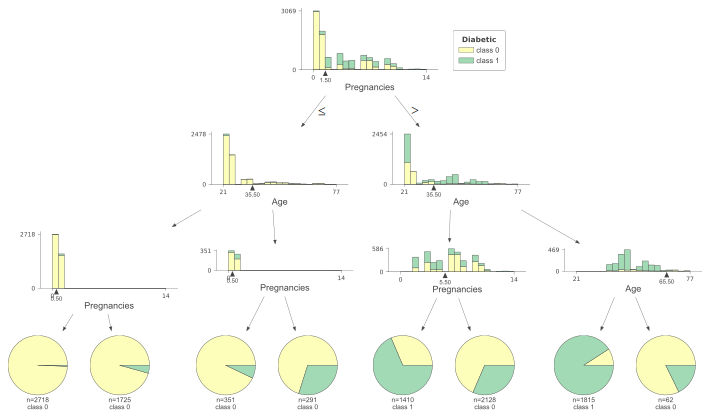

In [135]:
from dtreeviz import trees
import graphviz

viz = trees.dtreeviz(model_tree, x_data=X_train, y_data=y_train,
                     target_name='Diabetic', feature_names = X_train.columns)
viz


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


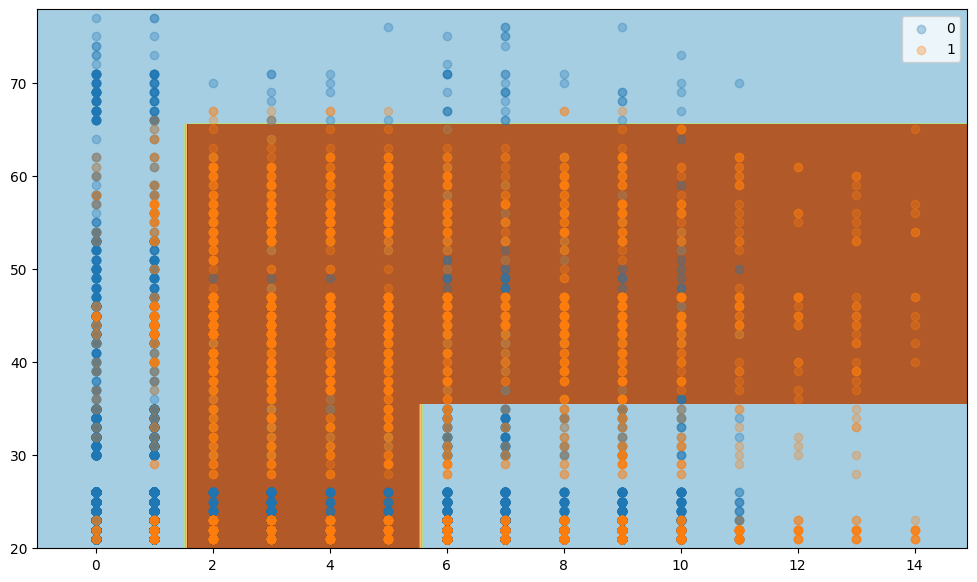

In [136]:
import numpy as np
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



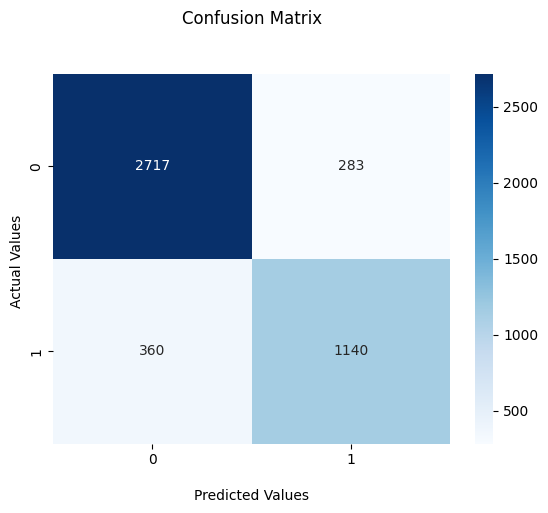

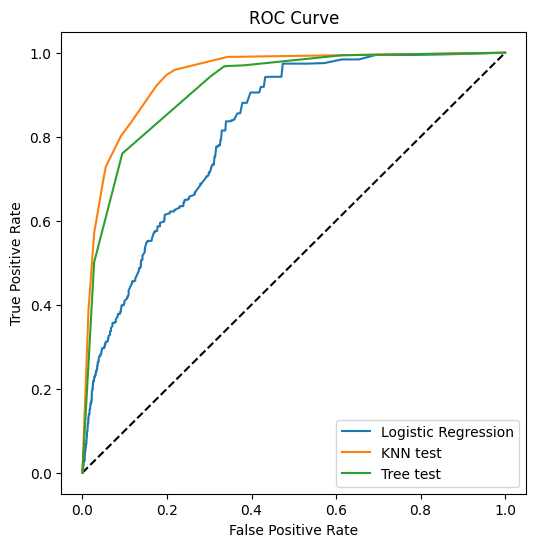

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804
2            Tree test  0.780021  0.915466

In [137]:
calculate_metrics(model_tree, 'Tree test', X_test, y_test)

### Ćwiczenie
Sprawdź jak zachowuje się model dla różnej głębokości (max_depth) oraz minimalnej liczby obserwacji w liściu (min_samples_leaf). Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym.

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


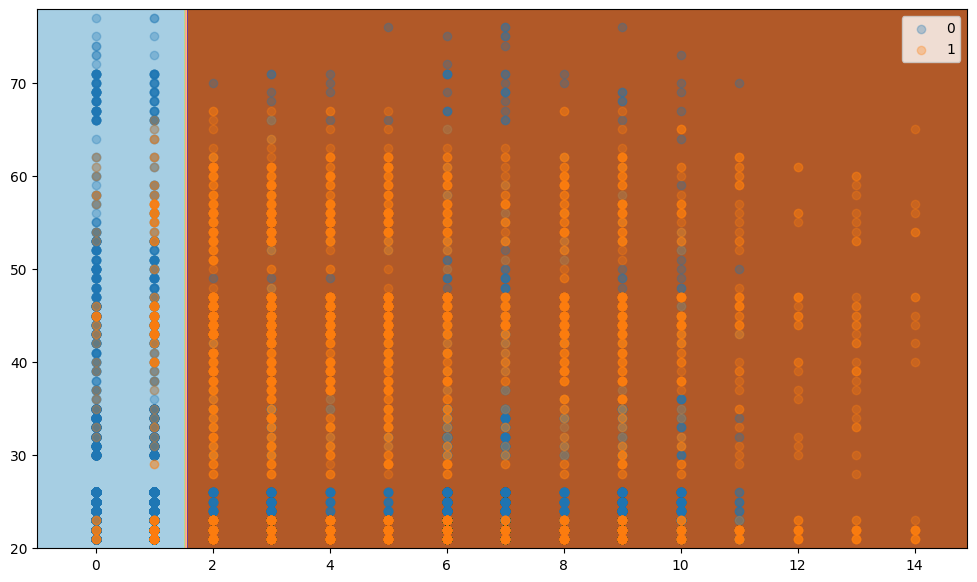

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


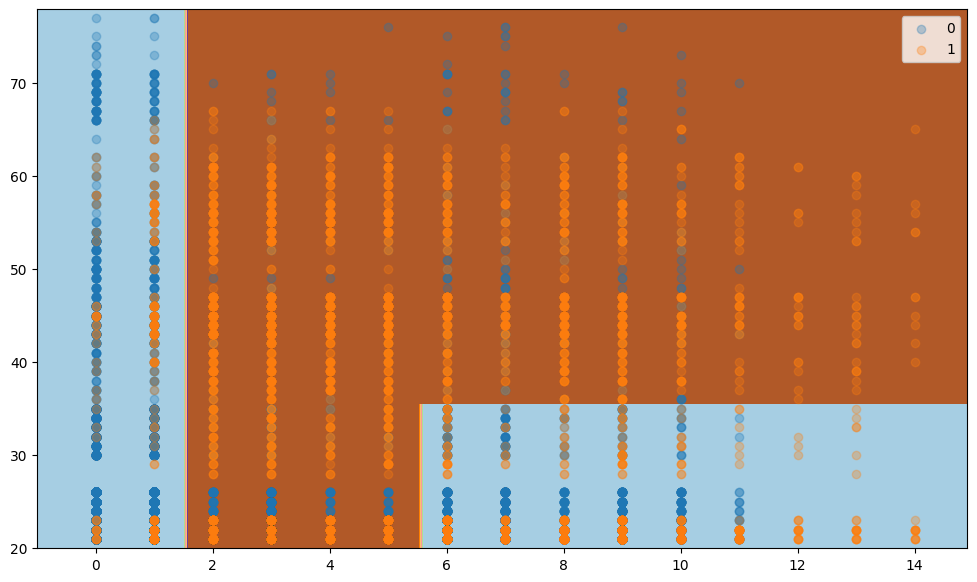

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


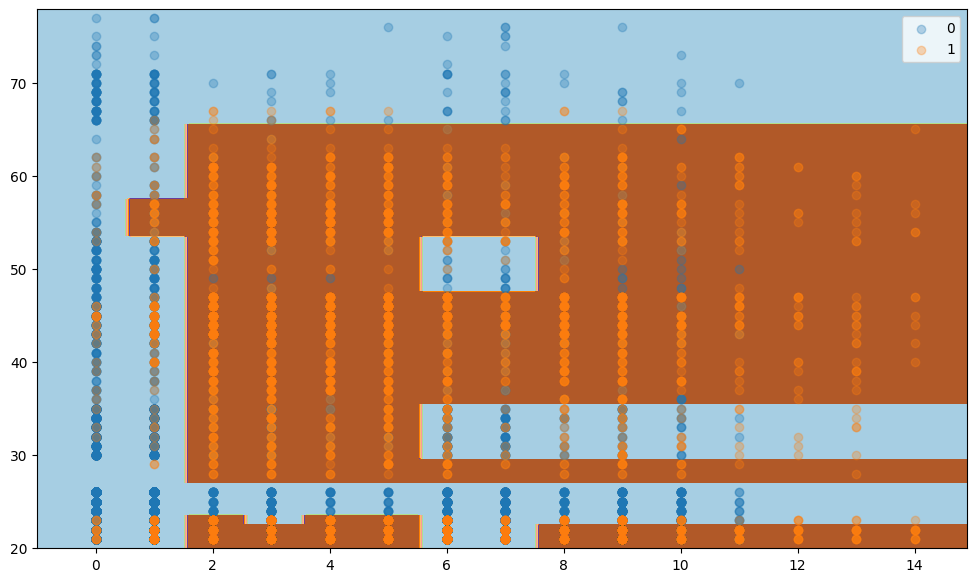

F1_score tree test: 0.7800205268559699
F1_score tree train: 0.7779925650557621
F1_score tree 1 test: 0.7388137356919874
F1_score tree 1 train: 0.7396522714526079
F1_score tree 5 test: 0.7778532608695652
F1_score tree 5 train: 0.7741270075143657
F1_score tree 7 test: 0.8254901960784313
F1_score tree 7 train: 0.834534407234704


In [138]:
model_tree_1 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=int(
                X_train.shape[0]*0.050))
model_tree_1.fit(X_train, y_train)
model_tree_5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=int(
                X_train.shape[0]*0.070))
model_tree_5.fit(X_train, y_train)
model_tree_7 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=int(
                X_train.shape[0]*0.002))
model_tree_7.fit(X_train, y_train)

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_tree_1)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_tree_5)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_tree_7)

pred_tree = model_tree.predict(X_test)
print("F1_score tree test:", f1_score(y_test, pred_tree))
pred_tree = model_tree.predict(X_train)
print("F1_score tree train:", f1_score(y_train, pred_tree))
pred_tree_1 = model_tree_1.predict(X_test)
print("F1_score tree 1 test:", f1_score(y_test, pred_tree_1))
pred_tree_1 = model_tree_1.predict(X_train)
print("F1_score tree 1 train:", f1_score(y_train, pred_tree_1))
pred_tree_5 = model_tree_5.predict(X_test)
print("F1_score tree 5 test:", f1_score(y_test, pred_tree_5))
pred_tree_5 = model_tree_5.predict(X_train)
print("F1_score tree 5 train:", f1_score(y_train, pred_tree_5))
pred_tree_7 = model_tree_7.predict(X_test)
print("F1_score tree 7 test:", f1_score(y_test, pred_tree_7))
pred_tree_7 = model_tree_7.predict(X_train)
print("F1_score tree 7 train:", f1_score(y_train, pred_tree_7))

# SVM (Support Vector Machines) - Maszyna wektorów nośnych

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


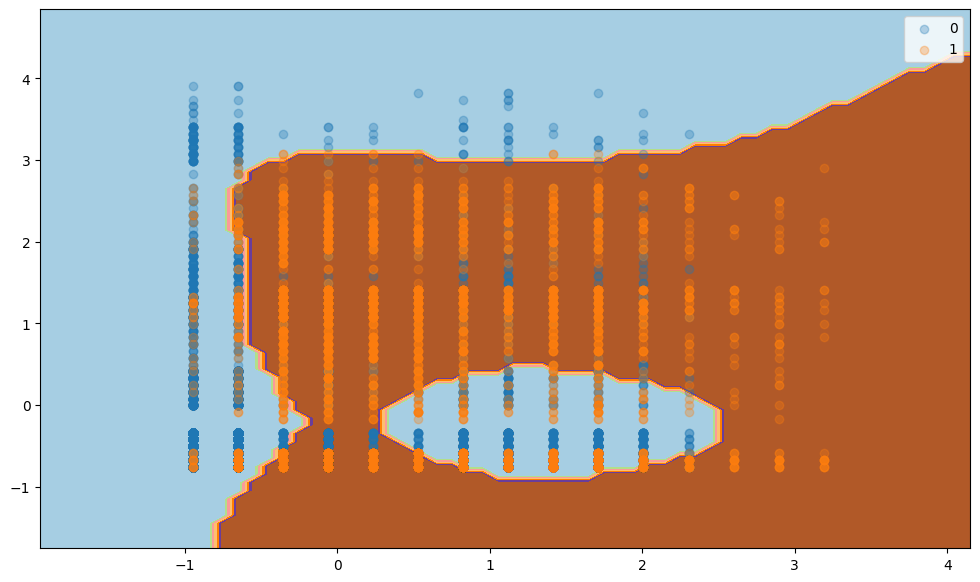

In [139]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3000
           1       0.80      0.79      0.79      1500

    accuracy                           0.86      4500
   macro avg       0.85      0.84      0.85      4500
weighted avg       0.86      0.86      0.86      4500



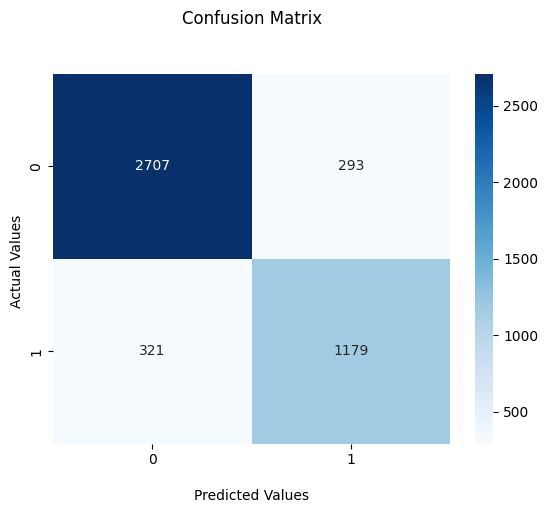

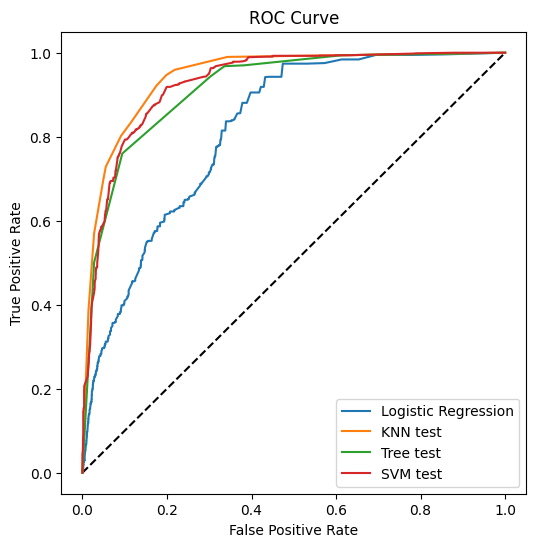

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804
2            Tree test  0.780021  0.915466
3             SVM test  0.793405  0.927971

In [140]:
calculate_metrics(model_svm, 'SVM test', X_test_standardized, y_test)

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


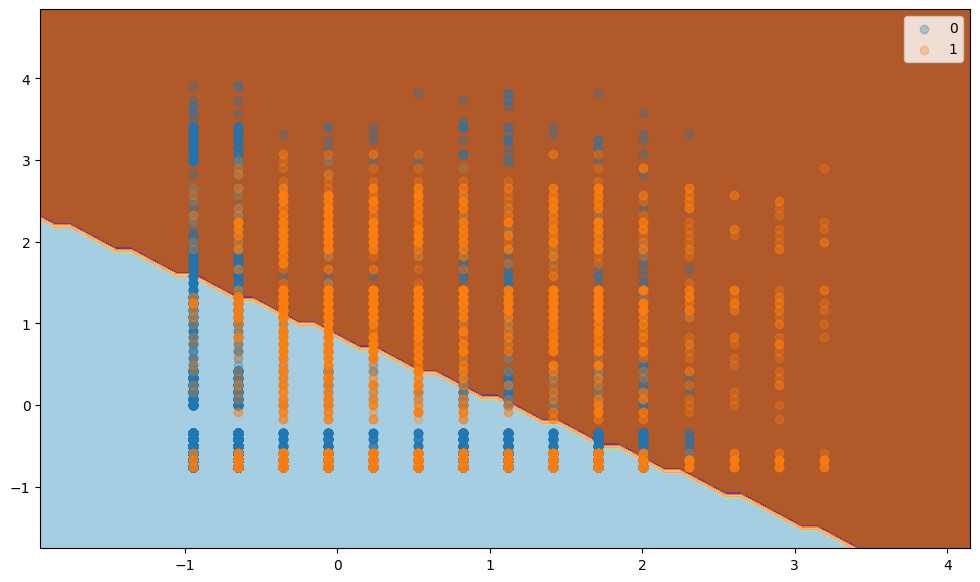

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


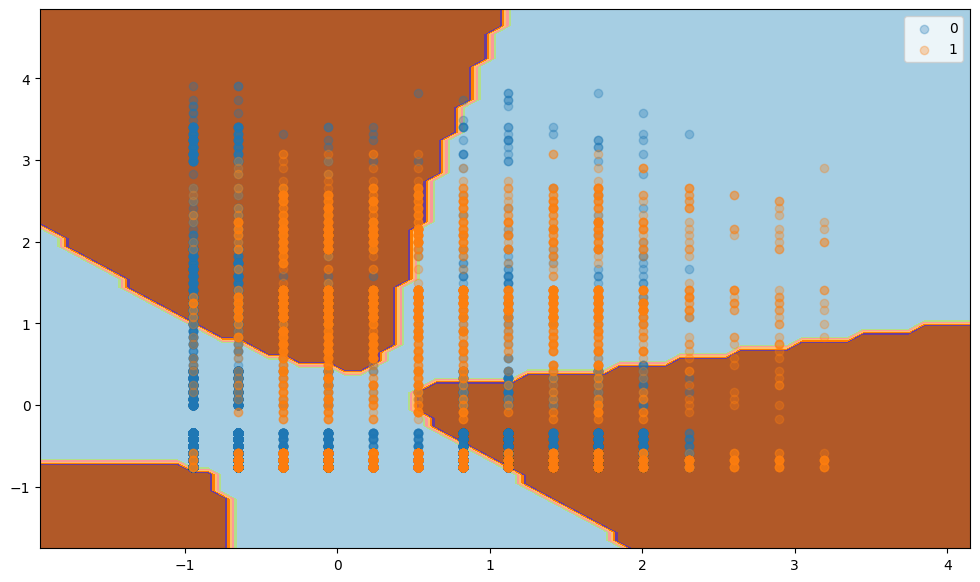

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


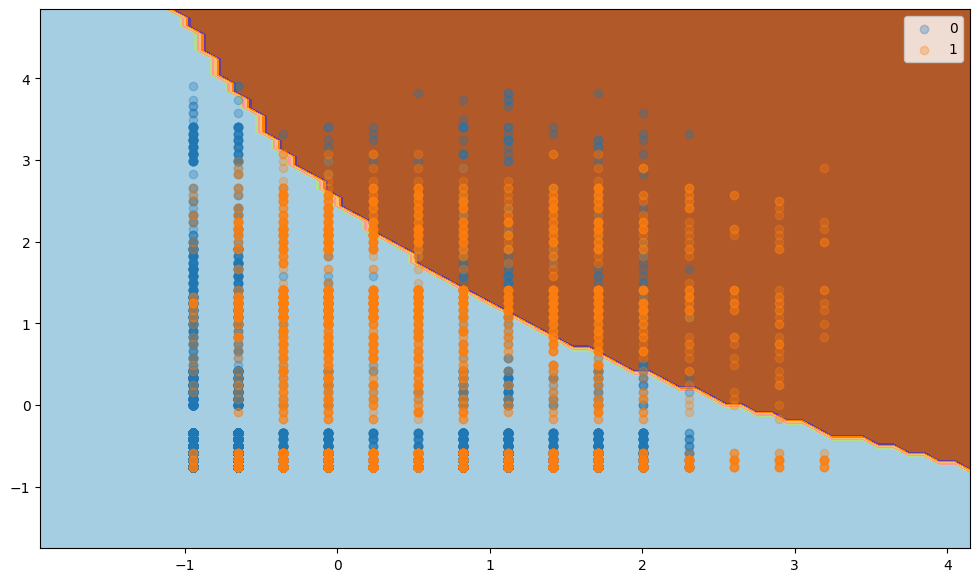

F1_score svm test: 0.7934051144010766
F1_score svm train: 0.7881368374688005
F1_score svm 1 test: 0.588855421686747
F1_score svm 1 train: 0.57504105090312
F1_score svm 2 test: 0.4421720733427362
F1_score svm 2 train: 0.45233812949640284
F1_score svm 3 test: 0.3412322274881517
F1_score svm 3 train: 0.3157409541368979


In [141]:
model_svm_1 = SVC(C=0.1,kernel='linear', probability=True)
model_svm_1.fit(X_train_standardized, y_train)
model_svm_2 = SVC(C=0.9,kernel='sigmoid', probability=True)
model_svm_2.fit(X_train_standardized, y_train)
model_svm_3 = SVC(C=1.5,kernel='poly', probability=True)
model_svm_3.fit(X_train_standardized, y_train)


plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_svm_1)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_svm_2)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, 
                            trained_model=model_svm_3)

pred_svm = model_svm.predict(X_test_standardized)
print("F1_score svm test:", f1_score(y_test, pred_svm))
pred_svm = model_svm.predict(X_train_standardized)
print("F1_score svm train:", f1_score(y_train, pred_svm))
pred_svm_1 = model_svm_1.predict(X_test_standardized)
print("F1_score svm 1 test:", f1_score(y_test, pred_svm_1))
pred_svm_1 = model_svm_1.predict(X_train_standardized)
print("F1_score svm 1 train:", f1_score(y_train, pred_svm_1))
pred_svm_2 = model_svm_2.predict(X_test_standardized)
print("F1_score svm 2 test:", f1_score(y_test, pred_svm_2))
pred_svm_2 = model_svm_2.predict(X_train_standardized)
print("F1_score svm 2 train:", f1_score(y_train, pred_svm_2))
pred_svm_3 = model_svm_3.predict(X_test_standardized)
print("F1_score svm 3 test:", f1_score(y_test, pred_svm_3))
pred_svm_3 = model_svm_3.predict(X_train_standardized)
print("F1_score svm 3 train:", f1_score(y_train, pred_svm_3))

# Random Forest – Las drzew decyzyjnych

# Ilość drzew decyzyjnych w RandomForest

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


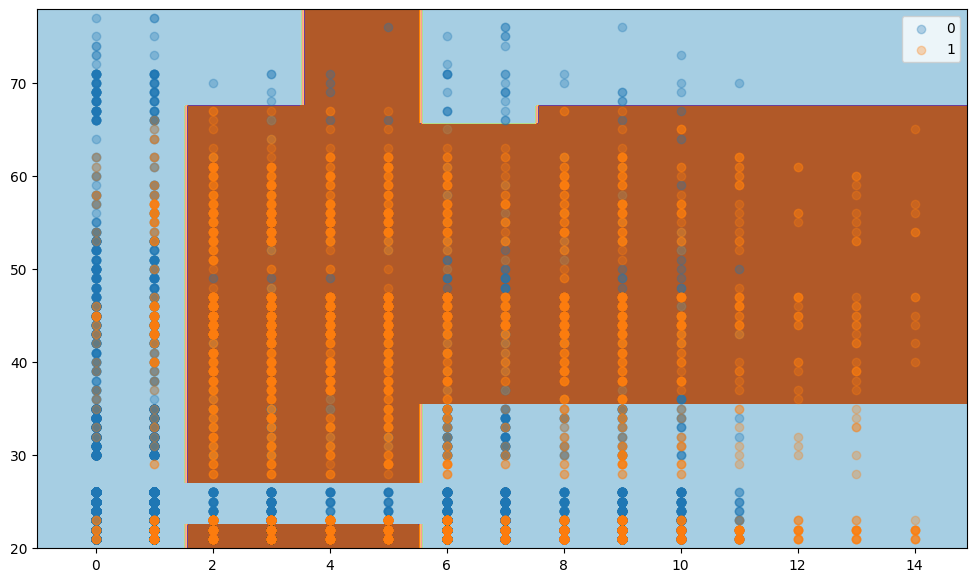

In [142]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, 
                min_samples_leaf=int(X_train.shape[0]*0.001))
model_forest.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3000
           1       0.85      0.72      0.78      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.83      0.84      4500
weighted avg       0.86      0.87      0.86      4500



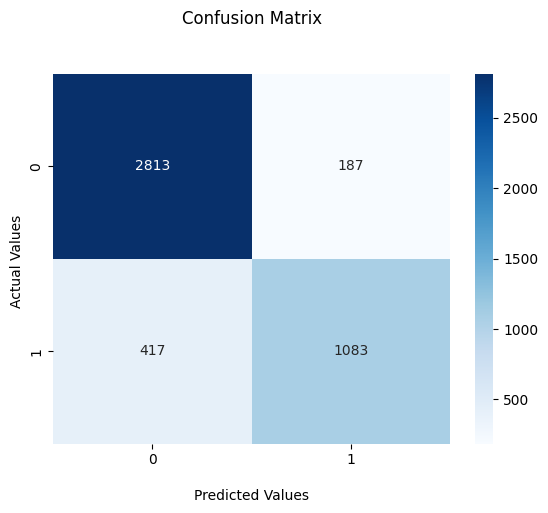

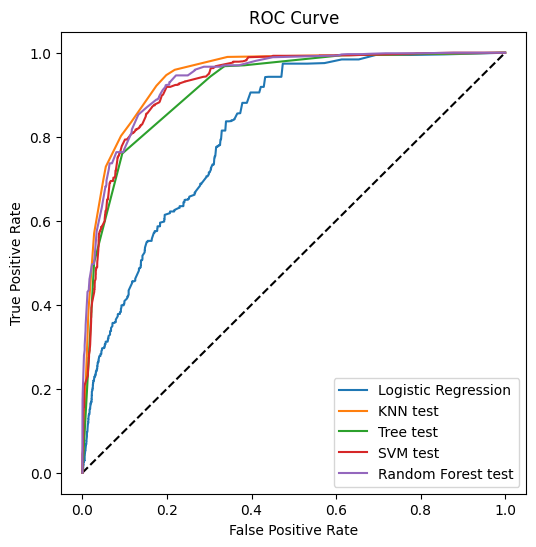

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804
2            Tree test  0.780021  0.915466
3             SVM test  0.793405  0.927971
4   Random Forest test  0.781949  0.936787

In [143]:
calculate_metrics(model_forest, 'Random Forest test', X_test, y_test)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


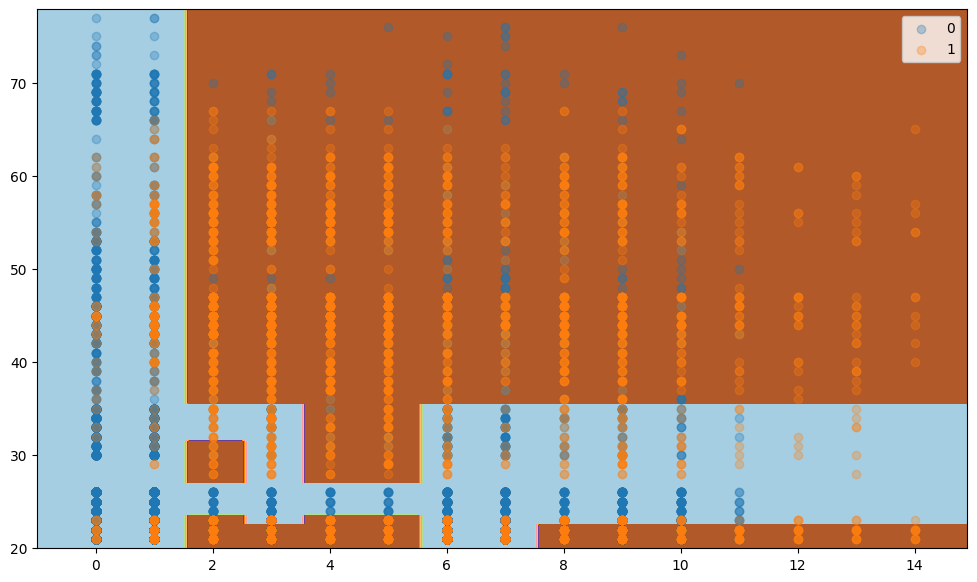

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


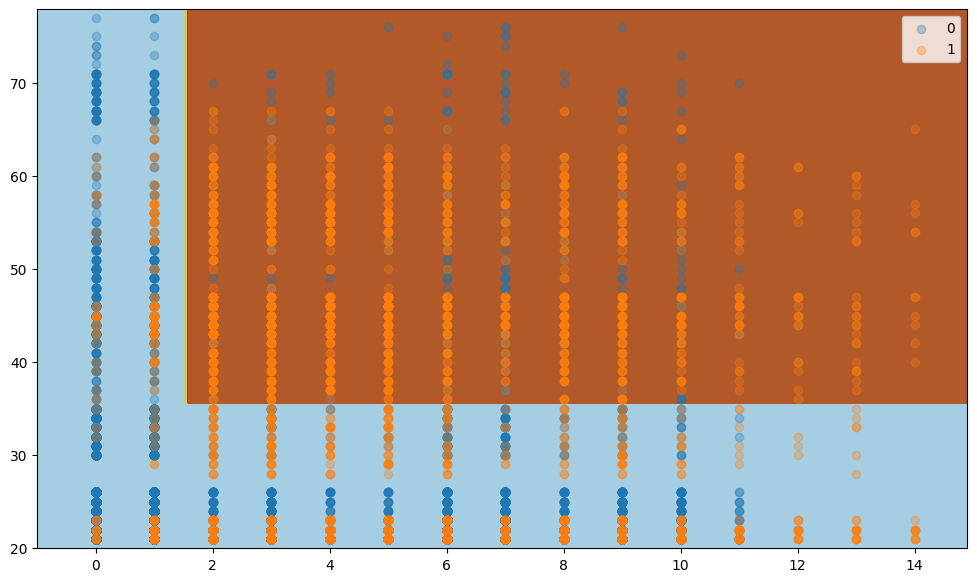

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


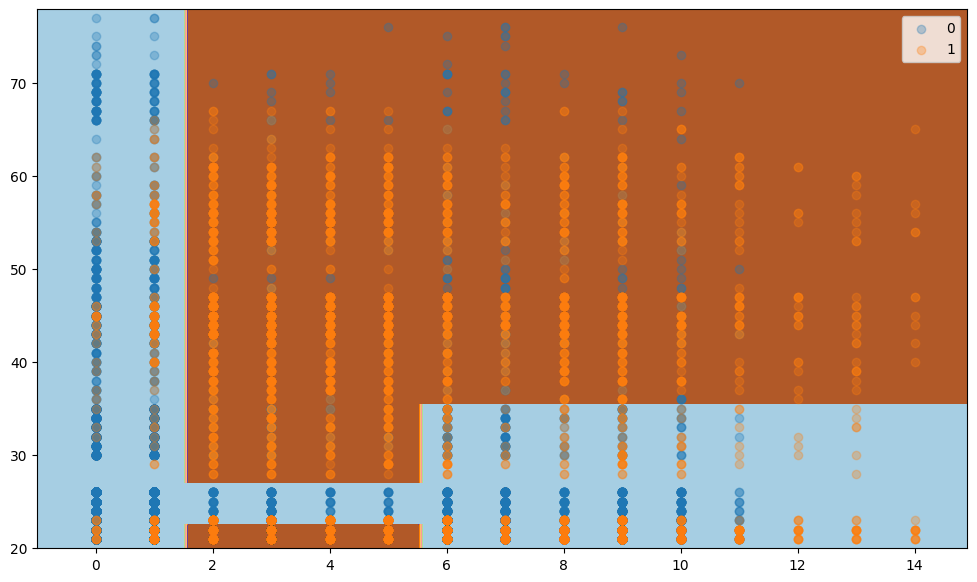

In [144]:
model_forest_1 = RandomForestClassifier(n_estimators=100, max_depth=5, 
                min_samples_leaf=int(X_train.shape[0]*0.020))
model_forest_1.fit(X_train, y_train)
model_forest_2= RandomForestClassifier(n_estimators=5000, max_depth=1, 
                min_samples_leaf=int(X_train.shape[0]*0.050))
model_forest_2.fit(X_train, y_train)
model_forest_3 = RandomForestClassifier(n_estimators=1000, max_depth=5, 
                min_samples_leaf=int(X_train.shape[0]*0.070))
model_forest_3.fit(X_train, y_train)

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_forest_1)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_forest_2)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_forest_3)


In [145]:
pred_forest = model_forest.predict(X_train)
print("F1_score forest train:", f1_score(y_train, pred_forest))
pred_forest = model_forest.predict(X_test)
print("F1_score forest test:", f1_score(y_test, pred_forest))
pred_forest_1 = model_forest_1.predict(X_train)
print("F1_score forest_1 train:", f1_score(y_train, pred_forest_1))
pred_forest_1 = model_forest_1.predict(X_test)
print("F1_score forest_1 test:", f1_score(y_test, pred_forest_1))
pred_forest_2 = model_forest_2.predict(X_train)
print("F1_score forest_2 train:", f1_score(y_train, pred_forest_2))
pred_forest_2 = model_forest_2.predict(X_test)
print("F1_score forest_2 test:", f1_score(y_test, pred_forest_2))
pred_forest_3 = model_forest_3.predict(X_train)
print("F1_score forest_3 train:", f1_score(y_train, pred_forest_3))
pred_forest_3 = model_forest_3.predict(X_test)
print("F1_score forest_3 test:", f1_score(y_test, pred_forest_3))

F1_score forest train: 0.7793633369923161
F1_score forest test: 0.7819494584837545
F1_score forest_1 train: 0.8153429345501212
F1_score forest_1 test: 0.8083140877598152
F1_score forest_2 train: 0.6174446717500465
F1_score forest_2 test: 0.6420382165605095
F1_score forest_3 train: 0.7743845434714864
F1_score forest_3 test: 0.778856526429342


# Boosting - AdaBoost

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


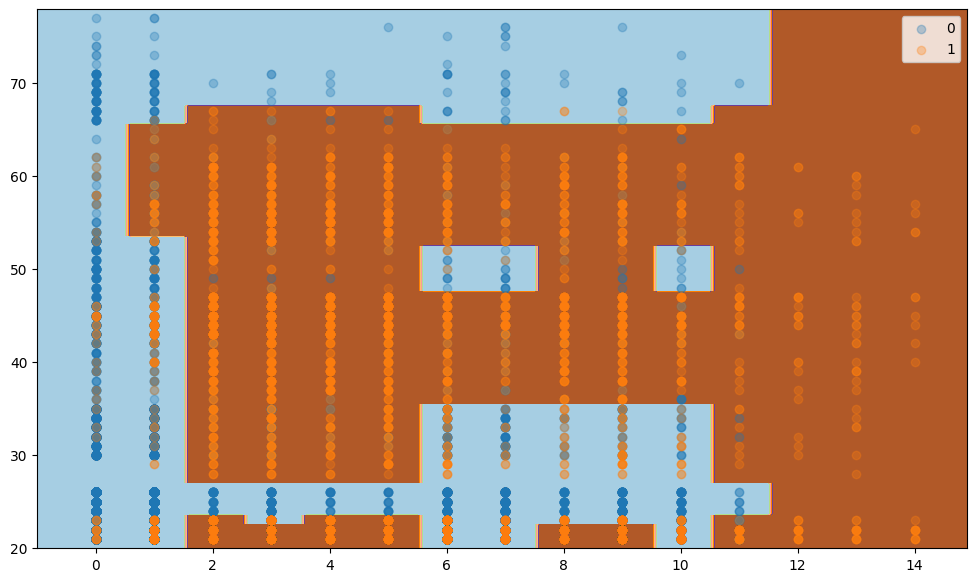

In [146]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                    n_estimators=50)
model_adaboost.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.84      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.89      0.88      0.88      4500



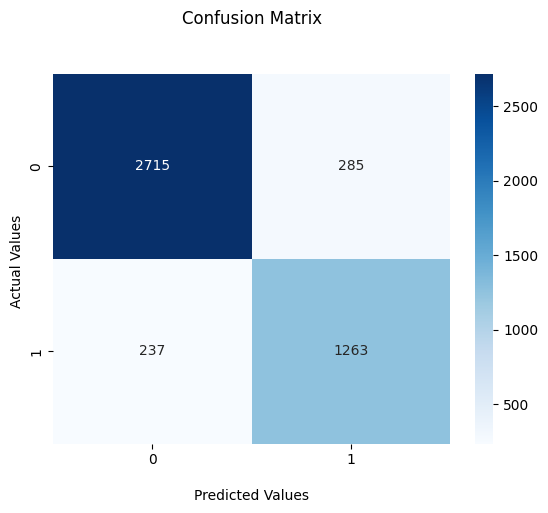

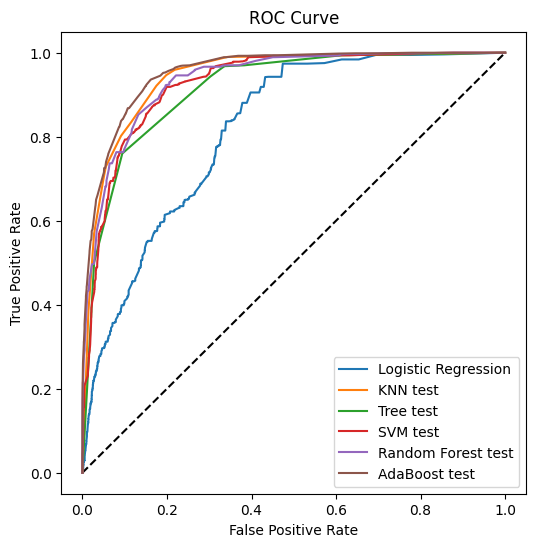

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804
2            Tree test  0.780021  0.915466
3             SVM test  0.793405  0.927971
4   Random Forest test  0.781949  0.936787
5        AdaBoost test  0.828740  0.953601

In [147]:
calculate_metrics(model_adaboost, 'AdaBoost test', X_test, y_test)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via

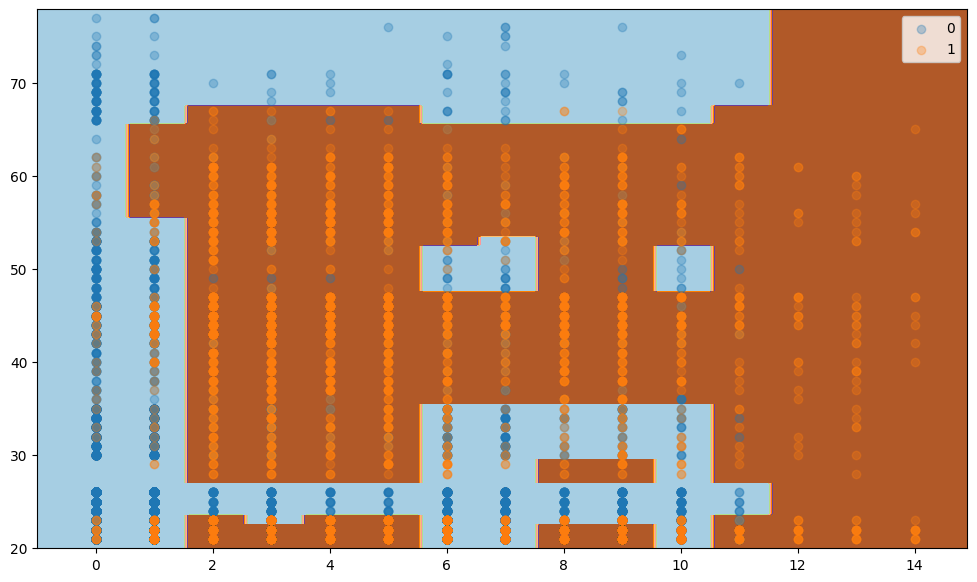

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


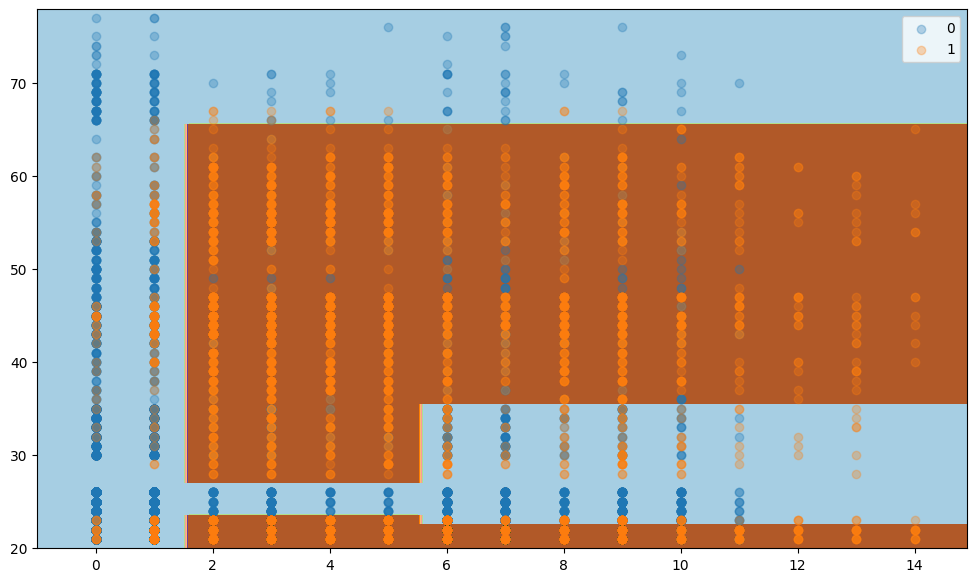

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


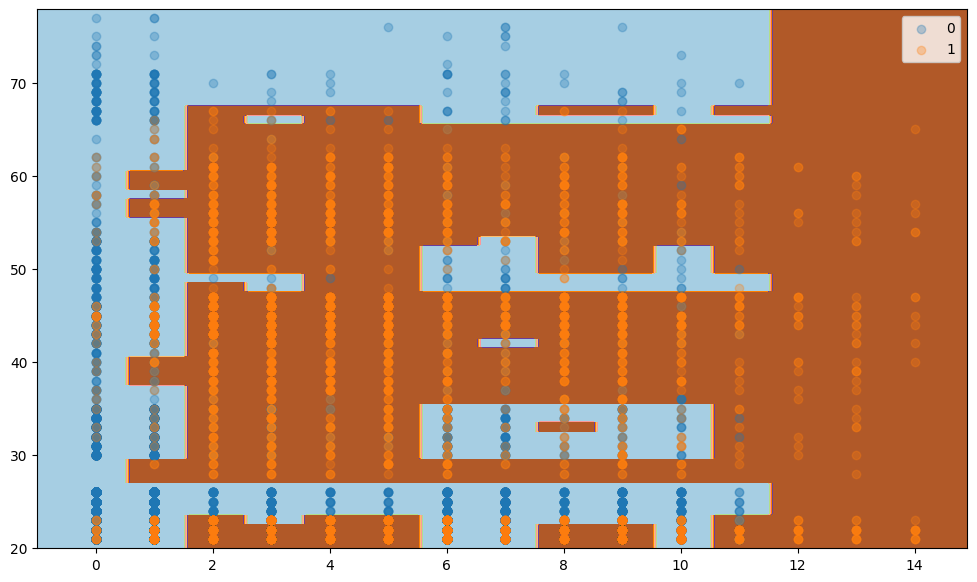

In [148]:
model_adaboost_1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                    n_estimators=100)
model_adaboost_1.fit(X_train, y_train)
model_adaboost_2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                    n_estimators=10)
model_adaboost_2.fit(X_train, y_train)
model_adaboost_3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), 
                    n_estimators=1000)
model_adaboost_3.fit(X_train, y_train)

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_adaboost_1)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_adaboost_2)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_adaboost_3)

In [149]:
pred_adaboost = model_adaboost.predict(X_train)
print("F1_score adaboost train:", f1_score(y_train, pred_adaboost))
pred_adaboost = model_adaboost.predict(X_test)
print("F1_score adaboost test:", f1_score(y_test, pred_adaboost))
pred_adaboost_1 = model_adaboost_1.predict(X_train)
print("F1_score adaboost_1 train:", f1_score(y_train, pred_adaboost_1))
pred_adaboost_1 = model_adaboost_1.predict(X_test)
print("F1_score adaboost_1 test:", f1_score(y_test, pred_adaboost_1))
pred_adaboost_2 = model_adaboost_2.predict(X_train)
print("F1_score adaboost_2 train:", f1_score(y_train, pred_adaboost_2))
pred_adaboost_2 = model_adaboost_2.predict(X_test)
print("F1_score adaboost_2 test:", f1_score(y_test, pred_adaboost_2))
pred_adaboost_3 = model_adaboost_3.predict(X_train)
print("F1_score adaboost_3 train:", f1_score(y_train, pred_adaboost_3))
pred_adaboost_3 = model_adaboost_3.predict(X_test)
print("F1_score adaboost_3 test:", f1_score(y_test, pred_adaboost_3))

F1_score adaboost train: 0.8361146769362431
F1_score adaboost test: 0.8287401574803149
F1_score adaboost_1 train: 0.8371628371628371
F1_score adaboost_1 test: 0.831143232588699
F1_score adaboost_2 train: 0.8169719330610095
F1_score adaboost_2 test: 0.8092626447288239
F1_score adaboost_3 train: 0.8405590416428979
F1_score adaboost_3 test: 0.8322940597308829


# Ensembling - Zespół klasyfikatorów

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Para

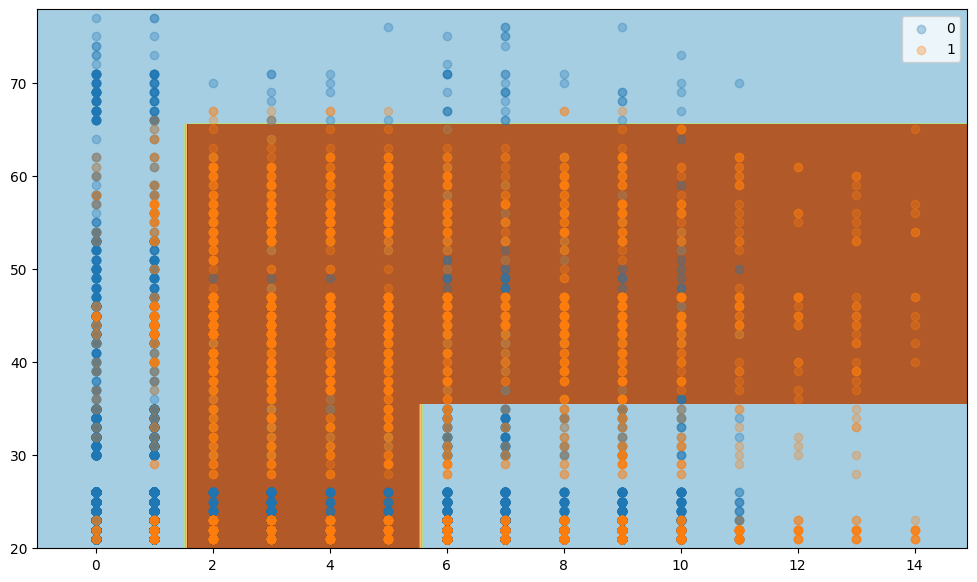

In [150]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



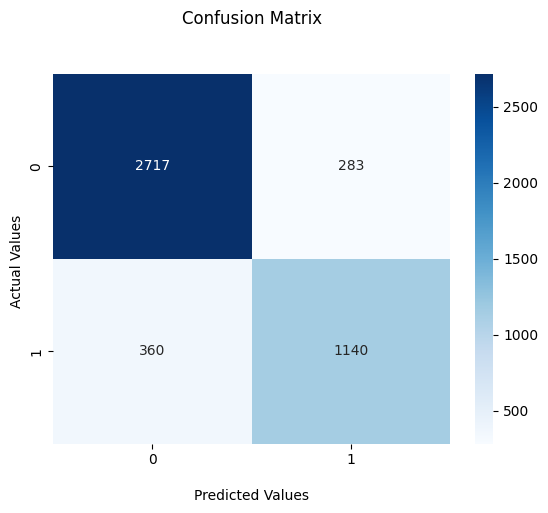

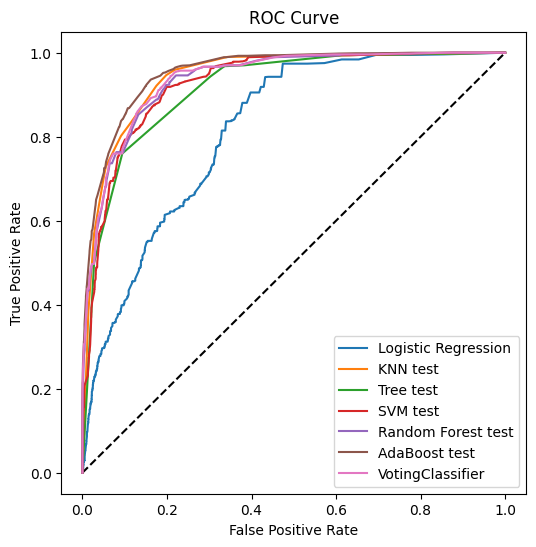

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804
2            Tree test  0.780021  0.915466
3             SVM test  0.793405  0.927971
4   Random Forest test  0.781949  0.936787
5        AdaBoost test  0.828740  0.953601
6     VotingClassifier  0.780021  0.939380

In [151]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)

In [152]:
model_voting_1 = VotingClassifier(estimators=[('Logistic Regression', model_lr),
                                            ('Knn', model_knn),
                                            ('SVM', model_svm)],
                                voting='soft')
model_voting_1.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Knn', KNeighborsClassifier(n_neighbors=10)),
                             ('SVM', SVC(probability=True))],
                 voting='soft')

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1111136682.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3,


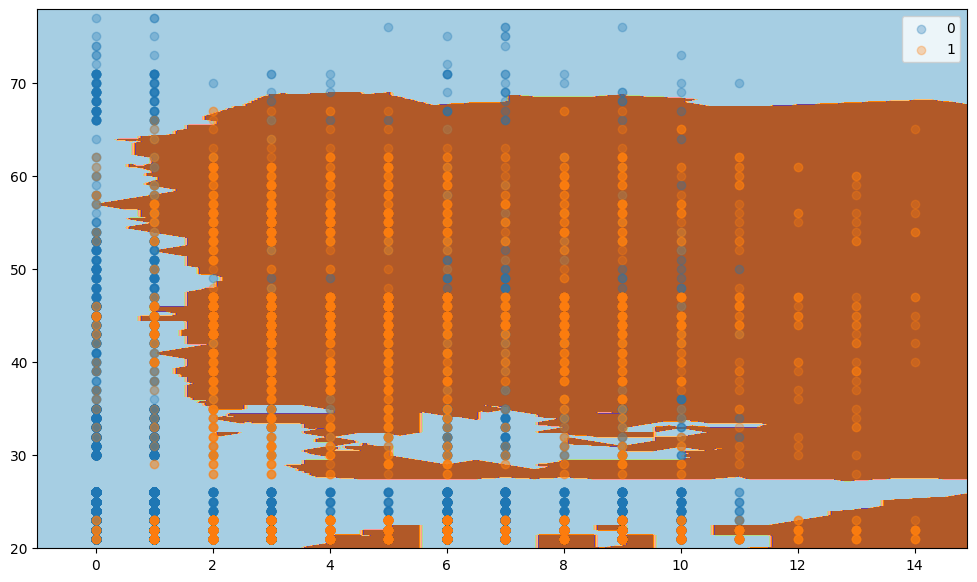

In [153]:
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, 
                            trained_model=model_voting_1)

In [154]:
pred_vot_1 = model_voting_1.predict(X_train)
print("F1_score voting_1 train:", f1_score(y_train, pred_vot_1))
pred_vot_1 = model_voting_1.predict(X_test)
print("F1_score voting_1 test:", f1_score(y_test, pred_vot_1))

F1_score voting_1 train: 0.7080871180145196
F1_score voting_1 test: 0.7080890973036342


# Klasyfikacja na podstawie wielu zmiennych

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                    random_state=0, stratify=y)


In [156]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3000
           1       0.92      0.90      0.91      1500

    accuracy                           0.94      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.94      0.94      0.94      4500



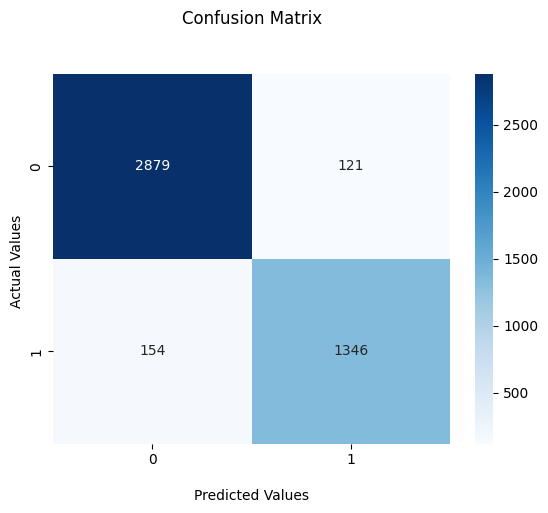

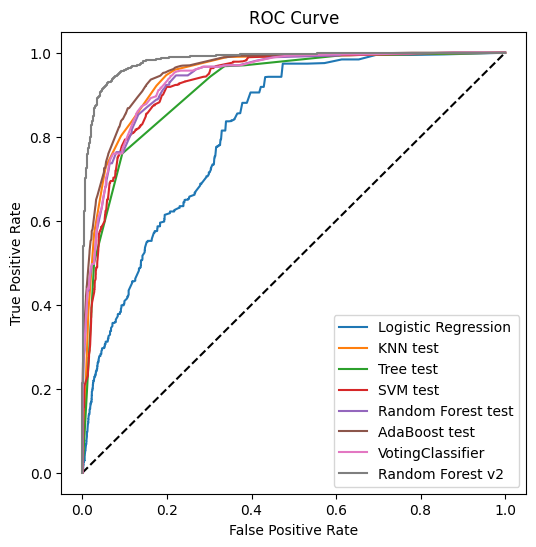

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0  Logistic Regression  0.580928  0.816493
1             KNN test  0.808196  0.942804
2            Tree test  0.780021  0.915466
3             SVM test  0.793405  0.927971
4   Random Forest test  0.781949  0.936787
5        AdaBoost test  0.828740  0.953601
6     VotingClassifier  0.780021  0.939380
7     Random Forest v2  0.907314  0.982616

In [157]:
calculate_metrics(rf_model_v2, 'Random Forest v2', X_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_iter=50, penalty=l1.....................................
[CV 1/5; 1/9] END ......max_iter=50, penalty=l1;, score=0.681 total time=   0.0s
[CV 2/5; 1/9] START max_iter=50, penalty=l1.....................................
[CV 2/5; 1/9] END ......max_iter=50, penalty=l1;, score=0.662 total time=   0.0s
[CV 3/5; 1/9] START max_iter=50, penalty=l1.....................................
[CV 3/5; 1/9] END ......max_iter=50, penalty=l1;, score=0.683 total time=   0.0s
[CV 4/5; 1/9] START max_iter=50, penalty=l1.....................................
[CV 4/5; 1/9] END ......max_iter=50, penalty=l1;, score=0.679 total time=   0.0s
[CV 5/5; 1/9] START max_iter=50, penalty=l1.....................................
[CV 5/5; 1/9] END ......max_iter=50, penalty=l1;, score=0.688 total time=   0.0s
[CV 1/5; 2/9] START max_iter=50, penalty=l2.....................................
[CV 1/5; 2/9] END ......max_iter=50, penalty=l2;,

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "c:\Users\magda\AppData

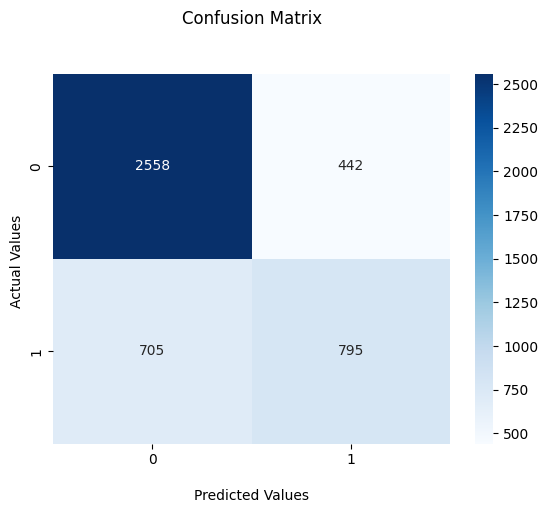

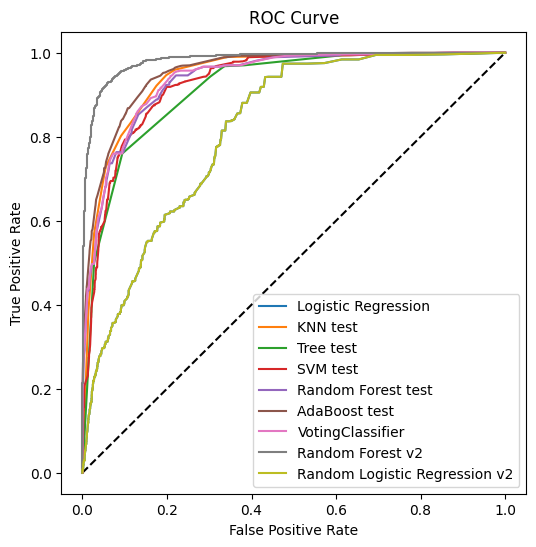

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0            Logistic Regression  0.580928  0.816493
1                       KNN test  0.808196  0.942804
2                      Tree test  0.780021  0.915466
3                       SVM test  0.793405  0.927971
4             Random Forest test  0.781949  0.936787
5                  AdaBoost test  0.828740  0.953601
6               VotingClassifier  0.780021  0.939380
7               Random Forest v2  0.907314  0.982616
8  Random Logistic Regression v2  0.580928  0.816493

In [158]:
random_lr = LogisticRegression(solver='saga')
params_lr = {'max_iter': [50, 100, 150],
             'penalty': ['l1', 'l2', 'elasticnet']}
lr_gridsearch = GridSearchCV(random_lr,
                             params_lr,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10)
lr_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', lr_gridsearch.best_params_)
lr_model_v2 = lr_gridsearch.best_estimator_

calculate_metrics(lr_model_v2, 'Random Logistic Regression v2', X_test_standardized, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'leaf_size': 10, 'n_neighbors': 20}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3000
           1       0.82      0.81      0.81      1500

    accuracy                           0.88      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.88      0.88      0.88      4500



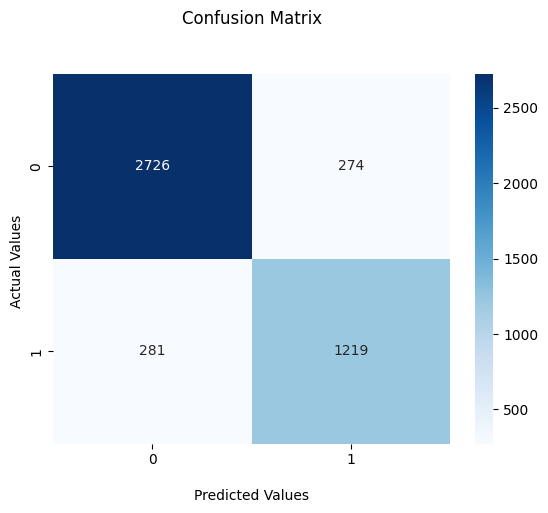

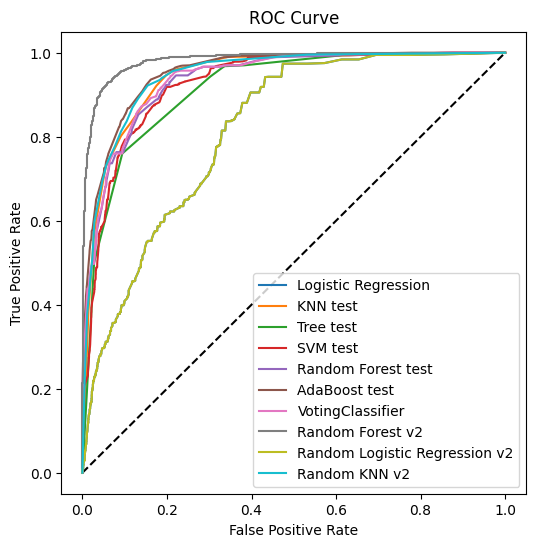

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0            Logistic Regression  0.580928  0.816493
1                       KNN test  0.808196  0.942804
2                      Tree test  0.780021  0.915466
3                       SVM test  0.793405  0.927971
4             Random Forest test  0.781949  0.936787
5                  AdaBoost test  0.828740  0.953601
6               VotingClassifier  0.780021  0.939380
7               Random Forest v2  0.907314  0.982616
8  Random Logistic Regression v2  0.580928  0.816493
9                  Random KNN v2  0.814567  0.946133

In [159]:
random_knn = KNeighborsClassifier(metric='minkowski')
params_knn = {'n_neighbors': [3, 5, 10, 20],
             'leaf_size': [10, 30, 50, 100]}
knn_gridsearch = GridSearchCV(random_knn,
                             params_knn,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
knn_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', knn_gridsearch.best_params_)
knn_model_v2 = knn_gridsearch.best_estimator_

calculate_metrics(knn_model_v2, 'Random KNN v2', X_test_standardized, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START coef0=0.0, degree=1.........................................
[CV 1/5; 1/4] END ..........coef0=0.0, degree=1;, score=0.845 total time=   7.3s
[CV 2/5; 1/4] START coef0=0.0, degree=1.........................................
[CV 2/5; 1/4] END ..........coef0=0.0, degree=1;, score=0.830 total time=   7.0s
[CV 3/5; 1/4] START coef0=0.0, degree=1.........................................
[CV 3/5; 1/4] END ..........coef0=0.0, degree=1;, score=0.850 total time=   7.1s
[CV 4/5; 1/4] START coef0=0.0, degree=1.........................................
[CV 4/5; 1/4] END ..........coef0=0.0, degree=1;, score=0.854 total time=   7.2s
[CV 5/5; 1/4] START coef0=0.0, degree=1.........................................
[CV 5/5; 1/4] END ..........coef0=0.0, degree=1;, score=0.839 total time=   6.9s
[CV 1/5; 2/4] START coef0=0.0, degree=3.........................................
[CV 1/5; 2/4] END ..........coef0=0.0, degree=3;,

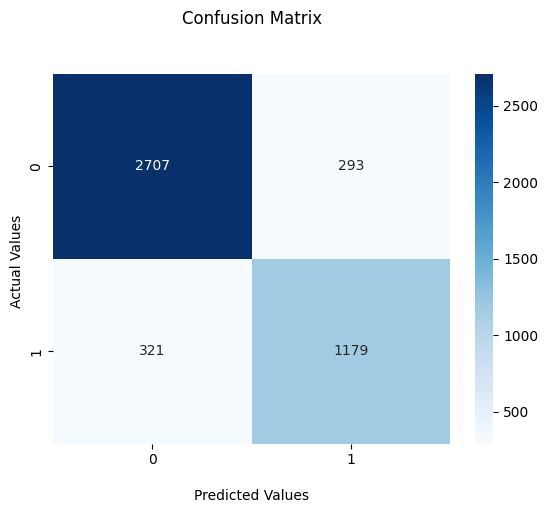

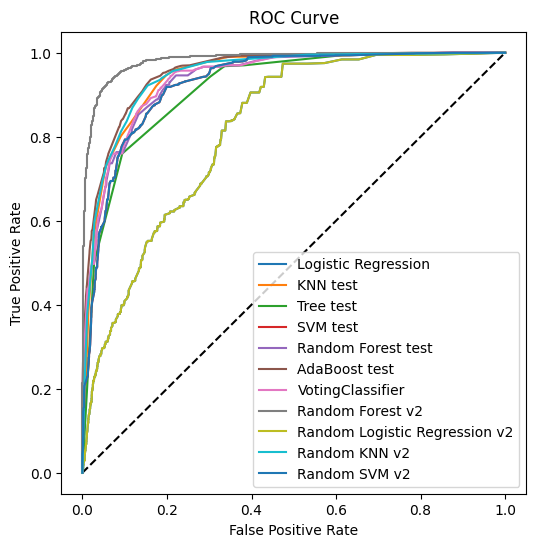

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0             Logistic Regression  0.580928  0.816493
1                        KNN test  0.808196  0.942804
2                       Tree test  0.780021  0.915466
3                        SVM test  0.793405  0.927971
4              Random Forest test  0.781949  0.936787
5                   AdaBoost test  0.828740  0.953601
6                VotingClassifier  0.780021  0.939380
7                Random Forest v2  0.907314  0.982616
8   Random Logistic Regression v2  0.580928  0.816493
9                   Random KNN v2  0.814567  0.946133
10                  Random SVM v2  0.793405  0.927969

In [160]:
random_svm = SVC(kernel='rbf', probability=True)
params_svm = {'degree': [1, 3],
             'coef0': [0.0, 0.5]}
svm_gridsearch = GridSearchCV(random_svm,
                             params_svm,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10)
svm_gridsearch.fit(X_train_standardized, y_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
svm_model_v2 = svm_gridsearch.best_estimator_

calculate_metrics(svm_model_v2, 'Random SVM v2', X_test_standardized, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 5}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3000
           1       0.87      0.87      0.87      1500

    accuracy                           0.91      4500
   macro avg       0.90      0.90      0.90      4500
weighted avg       0.91      0.91      0.91      4500



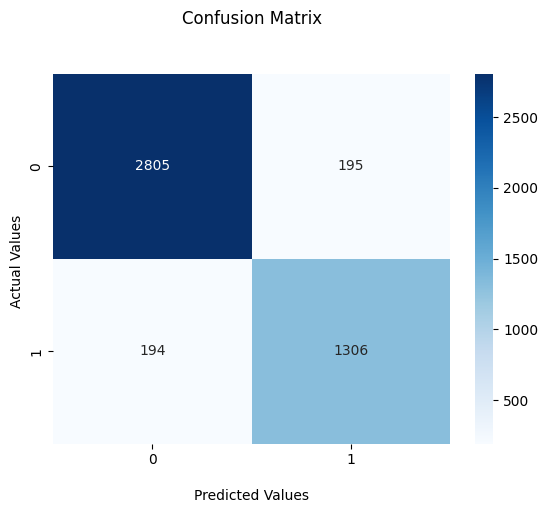

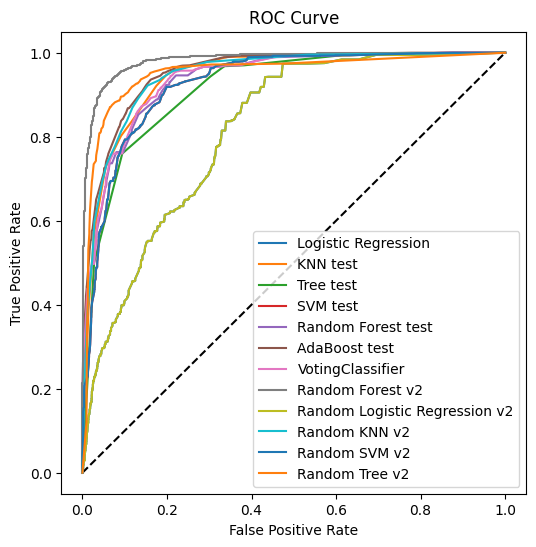

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0             Logistic Regression  0.580928  0.816493
1                        KNN test  0.808196  0.942804
2                       Tree test  0.780021  0.915466
3                        SVM test  0.793405  0.927971
4              Random Forest test  0.781949  0.936787
5                   AdaBoost test  0.828740  0.953601
6                VotingClassifier  0.780021  0.939380
7                Random Forest v2  0.907314  0.982616
8   Random Logistic Regression v2  0.580928  0.816493
9                   Random KNN v2  0.814567  0.946133
10                  Random SVM v2  0.793405  0.927969
11                 Random Tree v2  0.870377  0.951641

In [161]:
random_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(
                                    X_train.shape[0]*0.001))
params_tree = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
tree_gridsearch = GridSearchCV(random_tree,
                             params_tree,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
tree_model_v2 = tree_gridsearch.best_estimator_

calculate_metrics(tree_model_v2, 'Random Tree v2', X_test, y_test)

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\skle


Best hyperparameter: {'learning_rate': 1.0, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3000
           1       0.94      0.93      0.94      1500

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



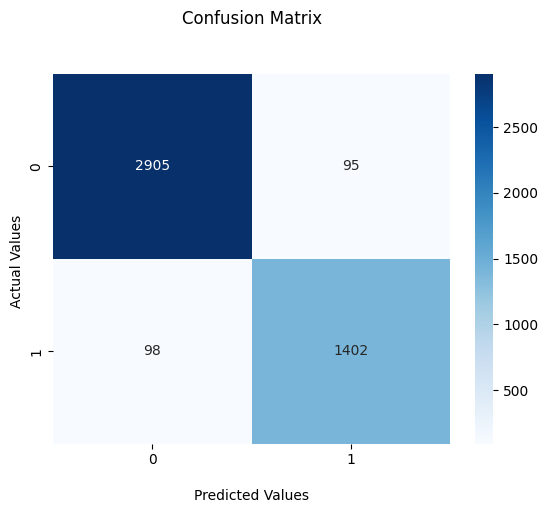

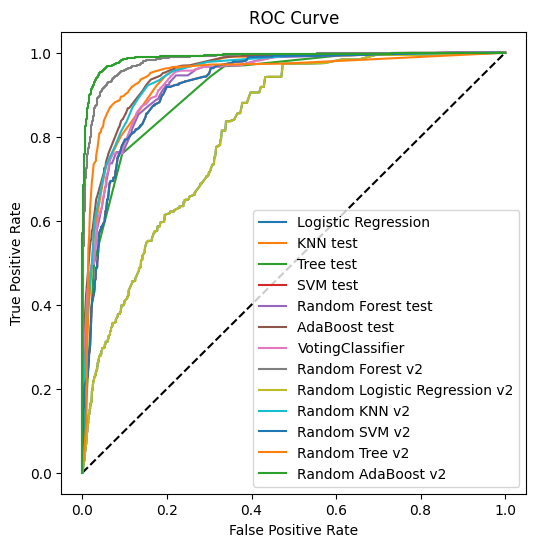

C:\Users\magda\AppData\Local\Temp\ipykernel_6628\1859841585.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


Model  F1_score       AUC
0             Logistic Regression  0.580928  0.816493
1                        KNN test  0.808196  0.942804
2                       Tree test  0.780021  0.915466
3                        SVM test  0.793405  0.927971
4              Random Forest test  0.781949  0.936787
5                   AdaBoost test  0.828740  0.953601
6                VotingClassifier  0.780021  0.939380
7                Random Forest v2  0.907314  0.982616
8   Random Logistic Regression v2  0.580928  0.816493
9                   Random KNN v2  0.814567  0.946133
10                  Random SVM v2  0.793405  0.927969
11                 Random Tree v2  0.870377  0.951641
12             Random AdaBoost v2  0.935602  0.989954

In [162]:
random_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))
params_adaboost= {'n_estimators': [20, 50, 100, 200],
             'learning_rate': [0.0, 0.2, 0.6, 1.0]}
adaboost_gridsearch = GridSearchCV(random_adaboost,
                             params_adaboost,
                             scoring='f1_macro',
                             cv=5)
adaboost_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', adaboost_gridsearch.best_params_)
adaboost_model_v2 = adaboost_gridsearch.best_estimator_

calculate_metrics(adaboost_model_v2, 'Random AdaBoost v2', X_test, y_test)